# Gender analysis

This analysis is about to find out what are the most important aspects that characterize female art historians around the world. The analysis focus its attention on geographical characterisics to find out if there are differences among female and male art historians.

The data are taken from Wikidata dataset only, an open knowledge base that provides extensive information about the entities it contains, including gender information.

It  would be used SPARQLWrapper (an extended version of RDFlib), because on the one hand it allows to query a remote SPARQL endpoint (in this case the Wikidata one) and to get up-to-date result data in JSON format. 

To do so, we get the URL of the API of the SPARQL endpoint, we prepare the SPARQL query regarding the worldwide number of male and female art historians, we then create the wrapper around the SPARQL API via SPARQLWrapper library, send the query and get the JSON results. 

For the analysis it was used mainly pandas and for the visualizations seaborn and matplotlib, all python libraries. 

## Birthplaces

The analysis starts  extracting the birth places where the majority of the female art historians were born

In [19]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp
import pandas as pd
import seaborn as sns

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

In [20]:
#query for printing the results
fembirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(fembirthplace_query)
sparql_wd.setReturnFormat(JSON)
womenbirthplacesResults = sparql_wd.query().convert()

#query for the csv
fem_csv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT   ?countryLabel ?countryCode (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY   ?countryLabel ?countryCode
ORDER BY DESC(?totwomen)
"""


In [21]:
for result in womenbirthplacesResults["results"]["bindings"]:
    birthplaces = result["placeofbirthLabel"]["value"]
    totaln = result["totwomen"]["value"]
    country = result["countryLabel"]["value"]
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian born in " + birthplaces + "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians born in " + birthplaces + "  (" + country+ ")")

There are 141  female art historians born in Prague  (Czech Republic)
There are 61  female art historians born in Vienna  (Austria)
There are 52  female art historians born in Berlin  (Germany)
There are 42  female art historians born in Brno  (Czech Republic)
There are 41  female art historians born in Budapest  (Hungary)
There are 39  female art historians born in Moscow  (Russia)
There are 29  female art historians born in Barcelona  (Spain)
There are 27  female art historians born in Rome  (Italy)
There are 27  female art historians born in Warsaw  (Poland)
There are 26  female art historians born in Hamburg  (Germany)
There are 26  female art historians born in Saint Petersburg  (Russia)
There are 23  female art historians born in London  (United Kingdom)
There are 23  female art historians born in Cologne  (Germany)
There are 23  female art historians born in Munich  (Germany)
There are 21  female art historians born in Paris  (France)
There are 21  female art historians born in 

There is 1  female art historian born in Catania  (Italy)
There is 1  female art historian born in Dietikon  (Switzerland)
There is 1  female art historian born in Oberdiessbach  (Switzerland)
There is 1  female art historian born in Wels  (Austria)
There is 1  female art historian born in Steyr  (Austria)
There is 1  female art historian born in Gelsenkirchen  (Germany)
There is 1  female art historian born in Herne  (Germany)
There is 1  female art historian born in Straubing  (Germany)
There is 1  female art historian born in Heubach  (Germany)
There is 1  female art historian born in Ratzeburg  (Germany)
There is 1  female art historian born in Unkel  (Germany)
There is 1  female art historian born in Soltau  (Germany)
There is 1  female art historian born in Hohenmölsen  (Germany)
There is 1  female art historian born in Prenzlau  (Germany)
There is 1  female art historian born in Edenkoben  (Germany)
There is 1  female art historian born in Hohen Neuendorf  (Germany)
There is 1  

In [22]:
#csv extracted with the previous query, we use country code in order to be sure of the correctedness of the data
import pandas as pd
import csv
df = pd.read_csv("birthplacefem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
birthfem_df = df[0:10]
print(birthfem_df)

                  countryLabel countryCode  totwomen
0                      Germany          DE       560
1               Czech Republic          CZ       422
2     United States of America          US       171
3                        Italy          IT       123
4                        Spain          ES       122
5                      Austria          AT       106
6                       Poland          PL        99
7                       France          FR        99
8                       Russia          RU        96
9                      Ukraine          UA        74
10                     Hungary          HU        61
11              United Kingdom          GB        60
12                 Netherlands          NL        45
13                 Switzerland          CH        40
14                    Slovenia          SI        32
15                    Slovakia          SK        27
16                      Sweden          SE        26
17                     Belarus          BY    

In [23]:
birthplacefem_dict = {}
birthplacefem_list = df[0:10]
birthplacefem_dict = birthplacefem_list.set_index('countryCode').T.to_dict('list') 
print(birthplacefem_dict)

{'DE': ['Germany', 560], 'CZ': ['Czech Republic', 422], 'US': ['United States of America', 171], 'IT': ['Italy', 123], 'ES': ['Spain', 122], 'AT': ['Austria', 106], 'PL': ['Poland', 99], 'FR': ['France', 99], 'RU': ['Russia', 96], 'UA': ['Ukraine', 74]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-24-7bd036494273>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


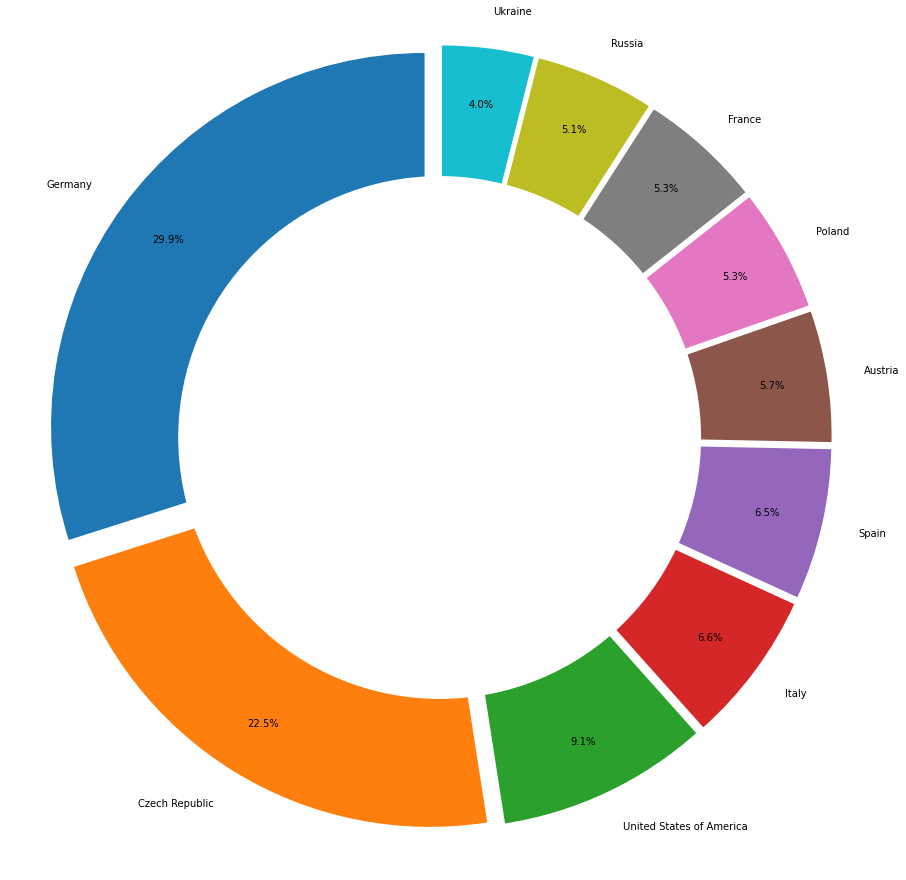

In [24]:
l = len(birthplacefem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in birthplacefem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Now we repeat the same procedure with the man

In [25]:
#query for printing the results
menbirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(menbirthplace_query)
sparql_wd.setReturnFormat(JSON)
menbirthplacesResults = sparql_wd.query().convert()
#query for the csv
male_csv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT   ?countryLabel ?countryCode (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY   ?countryLabel ?countryCode
ORDER BY DESC(?totwomen)
"""

In [26]:
for result in menbirthplacesResults["results"]["bindings"]:
    birthplaces = result["placeofbirthLabel"]["value"]
    totaln = result["totmen"]["value"]
    country = result["countryLabel"]["value"]
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + "male art historian born in " + birthplaces + "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + "male art historians born in " + birthplaces + "  (" + country+ ")")

There are 217 male art historians born in Prague  (Czech Republic)
There are 192 male art historians born in Berlin  (Germany)
There are 162 male art historians born in Paris  (France)
There are 157 male art historians born in Vienna  (Austria)
There are 89 male art historians born in Budapest  (Hungary)
There are 87 male art historians born in Munich  (Germany)
There are 75 male art historians born in London  (United Kingdom)
There are 75 male art historians born in Rome  (Italy)
There are 71 male art historians born in Hamburg  (Germany)
There are 61 male art historians born in Dresden  (Germany)
There are 61 male art historians born in Moscow  (Russia)
There are 60 male art historians born in Saint Petersburg  (Russia)
There are 53 male art historians born in Cologne  (Germany)
There are 53 male art historians born in Leipzig  (Germany)
There are 50 male art historians born in Frankfurt am Main  (Germany)
There are 49 male art historians born in Brno  (Czech Republic)
There are 49 m

There is 1 male art historian born in Hadersdorf-Weidlingau  (Austria)
There is 1 male art historian born in Hedelfingen  (Germany)
There is 1 male art historian born in Heřmanův Městec  (Czech Republic)
There is 1 male art historian born in Liesborn  (Germany)
There is 1 male art historian born in Quohren  (Germany)
There is 1 male art historian born in Hattingen  (Germany)
There is 1 male art historian born in Emsdetten  (Germany)
There is 1 male art historian born in Västerås  (Sweden)
There is 1 male art historian born in Lower Austria  (Austria)
There is 1 male art historian born in Brașov  (Romania)
There is 1 male art historian born in Mettingen  (Germany)
There is 1 male art historian born in Oldham  (United Kingdom)
There is 1 male art historian born in Dorfen  (Germany)
There is 1 male art historian born in Überlingen  (Germany)
There is 1 male art historian born in Coursan  (France)
There is 1 male art historian born in Hohrod  (France)
There is 1 male art historian born in 

There is 1 male art historian born in Biel/Bienne  (Switzerland)
There is 1 male art historian born in L’Aquila  (Italy)
There is 1 male art historian born in L’Aquila  (Kingdom of Italy)
There is 1 male art historian born in Ragusa  (Italy)
There is 1 male art historian born in Novi Ligure  (Italy)
There is 1 male art historian born in Lendinara  (Italy)
There is 1 male art historian born in Giacciano con Baruchella  (Italy)
There is 1 male art historian born in Novate Milanese  (Italy)
There is 1 male art historian born in Cuggiono  (Italy)
There is 1 male art historian born in Sigüenza  (Spain)
There is 1 male art historian born in Mottola  (Italy)
There is 1 male art historian born in San Giovanni Valdarno  (Italy)
There is 1 male art historian born in Calimera  (Italy)
There is 1 male art historian born in Spilimbergo  (Italy)
There is 1 male art historian born in Medford  (United States of America)
There is 1 male art historian born in Carpi  (Italy)
There is 1 male art historian

There is 1 male art historian born in Nootdorp  (Netherlands)
There is 1 male art historian born in Prutivka  (Ukraine)
There is 1 male art historian born in Prutivka  (Austria-Hungary)
There is 1 male art historian born in Prutivka  (Austrian Empire)
There is 1 male art historian born in Aigen  (Austria)
There is 1 male art historian born in Cagliari  (Italy)
There is 1 male art historian born in Schmiedeberg  (Germany)
There is 1 male art historian born in Vibo Valentia  (Italy)
There is 1 male art historian born in Anjar  (Lebanon)
There is 1 male art historian born in Ypres  (Belgium)
There is 1 male art historian born in Chernihiv  (Ukraine)
There is 1 male art historian born in Bled  (Slovenia)
There is 1 male art historian born in Lunéville  (France)
There is 1 male art historian born in Matsumoto  (Japan)
There is 1 male art historian born in Schliersee  (Germany)
There is 1 male art historian born in Aarschot  (Belgium)
There is 1 male art historian born in Hammelburg  (German

In [27]:
import pandas as pd
import csv
df = pd.read_csv("birthplaceman.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
citizenman_df = df[0:10]
print(citizenman_df)

                  countryLabel countryCode  totmen
0                      Germany          DE    2242
1               Czech Republic          CZ     785
2                       France          FR     623
3                        Italy          IT     531
4                       Poland          PL     369
5     United States of America          US     336
6                      Austria          AT     300
7               United Kingdom          GB     278
8                       Russia          RU     214
9                        Spain          ES     199
10                     Ukraine          UA     178
11                 Switzerland          CH     176
12                     Hungary          HU     172
13                 Netherlands          NL     160
14                     Belgium          BE     113
15                       Japan          JP     110
16                      Sweden          SE      92
17                     Romania          RO      75
18                    Slovenia 

In [28]:
birthplaceman_dict = {}
birthplaceman_list = df[0:10]
birthplaceman_dict = birthplaceman_list.set_index('countryCode').T.to_dict('list') 
print(birthplaceman_dict)

{'DE': ['Germany', 2242], 'CZ': ['Czech Republic', 785], 'FR': ['France', 623], 'IT': ['Italy', 531], 'PL': ['Poland', 369], 'US': ['United States of America', 336], 'AT': ['Austria', 300], 'GB': ['United Kingdom', 278], 'RU': ['Russia', 214], 'ES': ['Spain', 199]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-29-f2f614ae13e5>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


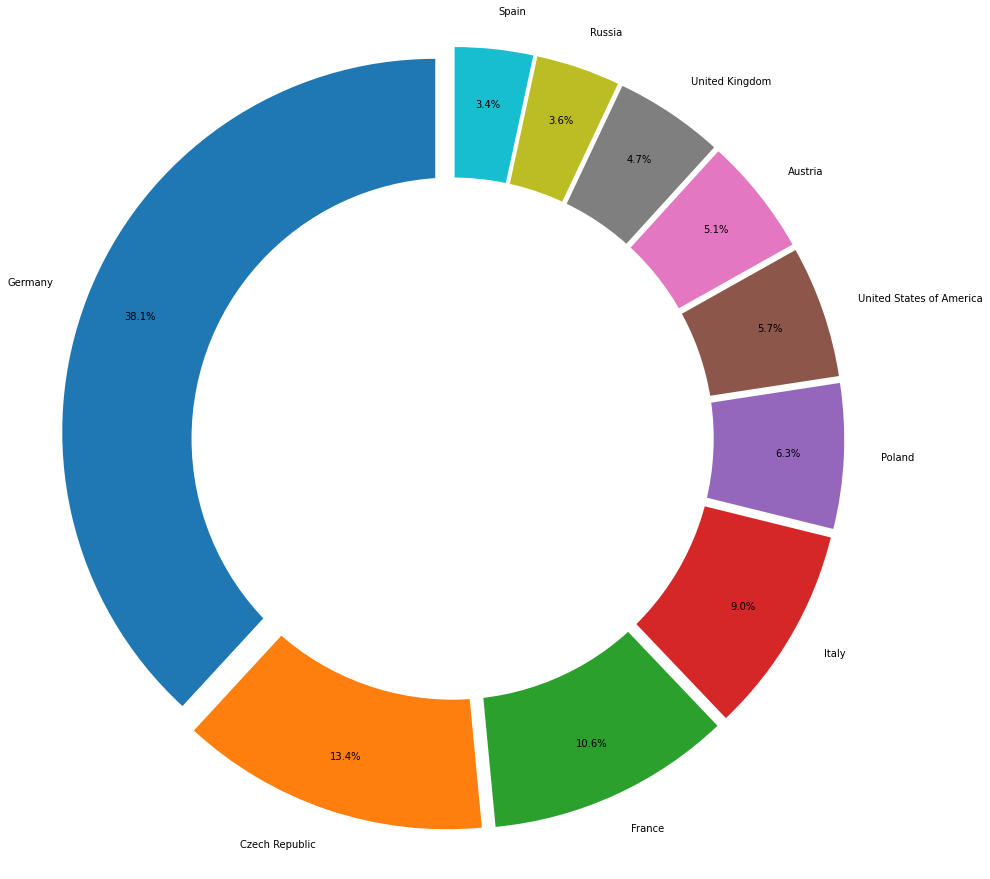

In [29]:
l = len(birthplaceman_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in birthplaceman_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

In [30]:
def sample_for_country(result, sex, subject):
    """
    * result: result of the query
    * sex: "man" or "woman" -> select the field "totman" or "totwoman"
    * subject: label of interest (example: placeofbirthLabel/educatedatLabel)
    * it returns the total number of people per country
    """
    #if verbose: print(result) #  emergency debug
    country_info = {}
    for person in result:
        subject_field = person[subject]["value"]

        country = person["countryLabel"]["value"]
        n_birth = person[f"tot{sex}"]["value"]

        if country not in country_info:
            country_info[country] = []
        country_info[country].append((subject_field, n_birth))

    
    tot_pp_per_country = {}
    for country in country_info:
        total_place_per_country = sum([int(n) for _,n in country_info[country]])
        tot_pp_per_country[country] = total_place_per_country
        
    
    return tot_pp_per_country




def get_top_sample_by_women(all_countries, women_sample, men_sample, top=10):
    total = []
    for country in all_countries:

        tot_w = 0
        tot_m = 0 

        if country in women_sample: 
            tot_w = women_sample[country]

        if country in men_sample: 
            tot_m = men_sample[country]

        total.append((country, tot_w, tot_m))

    top_on_women = [(w,m,c) for c,w,m in total]
    top_on_women.sort(reverse=True)
    top_on_women = top_on_women[:top]
    top_on_women = {c:{"women":w, "men":m} for w,m,c in top_on_women}

    return top_on_women


def get_women_man_differences(womenResults, manResults, label):
    """
    Given a result of two sparql querys (for woman and for men), 
    retrieve the differences by sex according to a specific label
    """
    women_data = sample_for_country(womenResults, 
                                   sex="women", 
                                   subject=label)

    men_data = sample_for_country(manResults, 
                                 sex="men", 
                                 subject=label)

    countries_of_data = set(women_data.keys()).union(set(men_data.keys()))
    print("women:\t", len(women_data), "\nmen:\t", len(men_data), "\nunion:\t", len(countries_of_data))

    data_dict = get_top_sample_by_women(countries_of_data, women_data, men_data)
    df = pd.DataFrame.from_dict(data_dict, orient="index").plot.bar()
    return data_dict


def execute_query(query):
    sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
    sparql_wd.setQuery(query)
    sparql_wd.setReturnFormat(JSON)
    result = sparql_wd.query().convert()
    return result["results"]["bindings"]


Let's combine the results

In [31]:
fembirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
        ?country wdt:P297 ?countryCode.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""

menbirthplace_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?placeofbirth ?placeofbirthLabel ?countryLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450; 
            wdt:P19 ?placeofbirth.
           ?placeofbirth wdt:P17 ?country.
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?placeofbirth ?placeofbirthLabel ?countryLabel
ORDER BY DESC(?totmen)
"""


womenbirthplacesResults = execute_query(fembirthplace_query)
menbirthplacesResults = execute_query(menbirthplace_query)

women:	 82 
men:	 139 
union:	 147


{'Germany': {'women': 561, 'men': 2242},
 'Czech Republic': {'women': 422, 'men': 785},
 'United States of America': {'women': 171, 'men': 336},
 'Italy': {'women': 123, 'men': 531},
 'Spain': {'women': 122, 'men': 200},
 'Austria': {'women': 106, 'men': 300},
 'France': {'women': 99, 'men': 624},
 'Poland': {'women': 99, 'men': 369},
 'Russia': {'women': 96, 'men': 215},
 'Ukraine': {'women': 74, 'men': 178}}

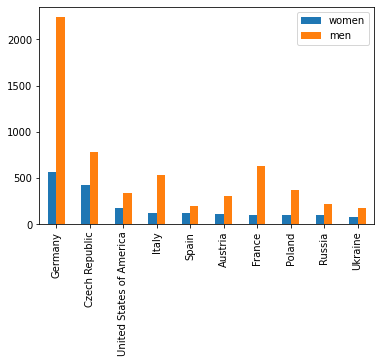

In [32]:
get_women_man_differences(womenResults = womenbirthplacesResults, 
                          manResults = menbirthplacesResults, 
                          label = "placeofbirthLabel")

## Citizenship

In [33]:
countryfem_query= """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(countryfem_query)
sparql_wd.setReturnFormat(JSON)
femcountryResults = sparql_wd.query().convert()


In [34]:
countryfem = {}
countryfemlist = []
for result in femcountryResults["results"]["bindings"]:
    country = result["citizenshipLabel"]["value"]
    totaln = result["totwomen"]["value"]
    countryfem[country] = totaln
    countryfemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian in " + country)
    else:
        print("There are "+ totaln + " " + " female art historians in " + country)

There are 474  female art historians in Germany
There are 361  female art historians in United States of America
There are 202  female art historians in France
There are 161  female art historians in Italy
There are 154  female art historians in Spain
There are 136  female art historians in Slovenia
There are 123  female art historians in Poland
There are 111  female art historians in United Kingdom
There are 103  female art historians in Austria
There are 81  female art historians in Russia
There are 74  female art historians in Kingdom of the Netherlands
There are 71  female art historians in Czech Republic
There are 60  female art historians in Switzerland
There are 58  female art historians in Hungary
There are 57  female art historians in Norway
There are 56  female art historians in Canada
There are 54  female art historians in Sweden
There are 52  female art historians in Denmark
There are 42  female art historians in Estonia
There are 29  female art historians in Finland
There 

Let's plot our results in a piechart using a pandas df

In [35]:
import pandas as pd
import csv
df = pd.read_csv("country_fem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
citizenfem_df = df[0:10]
print(citizenfem_df)

   countryCode                countryLabel  totwomen
0           DE                     Germany       473
1           US    United States of America       360
2           FR                      France       201
3           IT                       Italy       160
4           ES                       Spain       152
5           SI                    Slovenia       136
6           PL                      Poland       122
7           GB              United Kingdom       111
8           AT                     Austria       103
9           RU                      Russia        80
10          NL  Kingdom of the Netherlands        74
11          CZ              Czech Republic        71
12          CH                 Switzerland        60
13          HU                     Hungary        58
14          NO                      Norway        57
15          CA                      Canada        56
16          SE                      Sweden        54
17          DK                     Denmark    

In [36]:
#for readability reason of the visualization are taken into consideration the first 17 countries, to see graphically what are the 
countryfem_dict = {}
countryfem_list = df[0:18]
countryfem_dict = countryfem_list.set_index('countryCode').T.to_dict('list') 
print(countryfem_dict)

{'DE': ['Germany', 473], 'US': ['United States of America', 360], 'FR': ['France', 201], 'IT': ['Italy', 160], 'ES': ['Spain', 152], 'SI': ['Slovenia', 136], 'PL': ['Poland', 122], 'GB': ['United Kingdom', 111], 'AT': ['Austria', 103], 'RU': ['Russia', 80], 'NL': ['Kingdom of the Netherlands', 74], 'CZ': ['Czech Republic', 71], 'CH': ['Switzerland', 60], 'HU': ['Hungary', 58], 'NO': ['Norway', 57], 'CA': ['Canada', 56], 'SE': ['Sweden', 54], 'DK': ['Denmark', 52]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-37-1c84d3045002>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


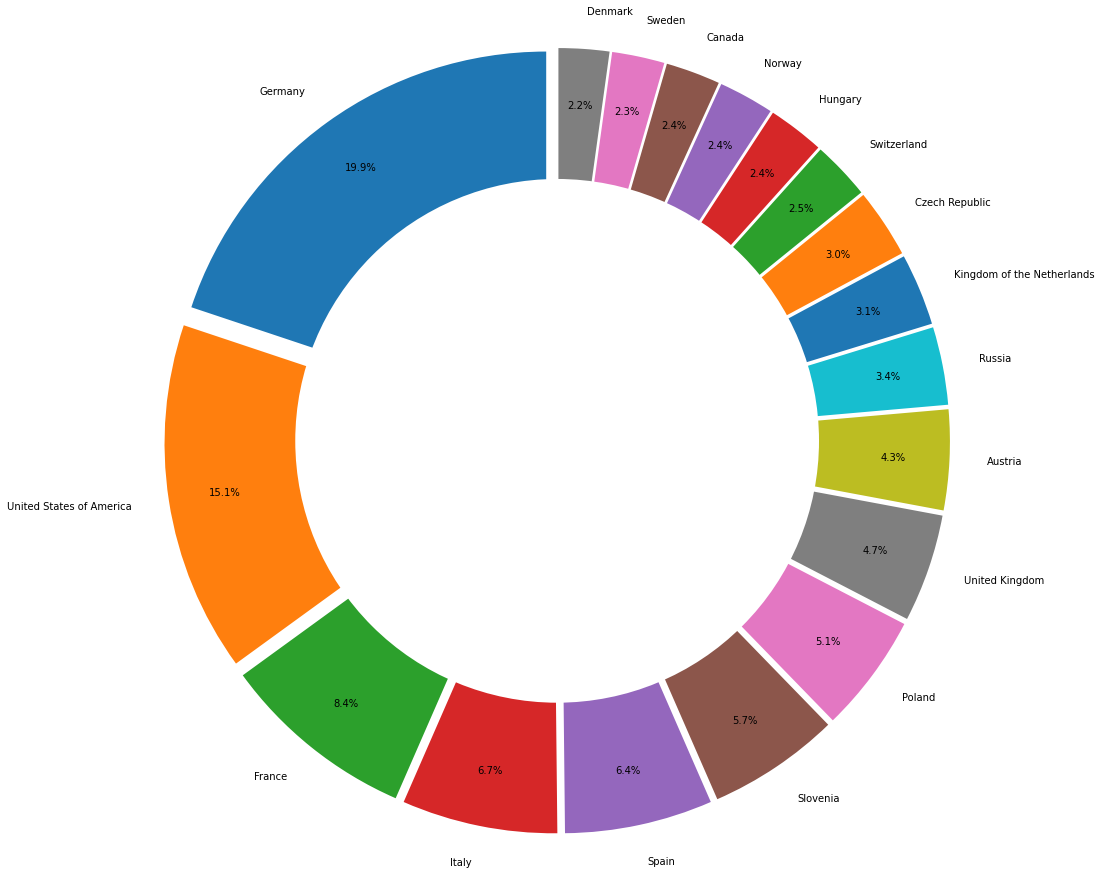

In [37]:
l = len(countryfem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countryfem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Now let's check the number of male art historians to see if there are differences

In [38]:
countrymen_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(countrymen_query)
sparql_wd.setReturnFormat(JSON)
mencountryResults = sparql_wd.query().convert()

In [39]:
countrymen = {}
countrymenlist = []
countrymenlistviz = []
for result in mencountryResults["results"]["bindings"]:
    country = result["citizenshipLabel"]["value"]
    totaln = result["totmen"]["value"]
    countrymen[country] = totaln
    countrymenlist.append(int(totaln))
    
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian in " + country)
    else:
        print("There are "+ totaln + " " + " male art historians in " + country)

There are 1887  male art historians in Germany
There are 776  male art historians in France
There are 595  male art historians in United States of America
There are 391  male art historians in United Kingdom
There are 364  male art historians in Italy
There are 340  male art historians in Austria
There are 260  male art historians in Poland
There are 242  male art historians in Spain
There are 216  male art historians in Switzerland
There are 194  male art historians in Kingdom of the Netherlands
There are 167  male art historians in Japan
There are 161  male art historians in Hungary
There are 147  male art historians in Sweden
There are 127  male art historians in Czech Republic
There are 123  male art historians in Belgium
There are 109  male art historians in Denmark
There are 102  male art historians in Slovenia
There are 102  male art historians in Russia
There are 95  male art historians in Norway
There are 70  male art historians in Canada
There are 45  male art historians in G

Let's have a pie chart to have visual representations of the results using a pandas df

In [40]:
import pandas as pd
import csv
df = pd.read_csv("country_men.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode                countryLabel  totmen
0           DE                     Germany    1888
1           FR                      France     772
2           US    United States of America     595
3           GB              United Kingdom     390
4           IT                       Italy     364
5           AT                     Austria     340
6           PL                      Poland     260
7           ES                       Spain     241
8           CH                 Switzerland     216
9           NL  Kingdom of the Netherlands     194
10          JP                       Japan     167
11          HU                     Hungary     160
12          SE                      Sweden     147
13          CZ              Czech Republic     126
14          BE                     Belgium     123
15          DK                     Denmark     104
16          SI                    Slovenia     102
17          RU                      Russia     102
18          NO                 

In [41]:
#for readability reason of the visualization are taken into consideration the first 17 countries, to see graphically what are the 
countrymale_dict = {}
countrymale_list = df[0:18]
countrymale_dict = countrymale_list.set_index('countryCode').T.to_dict('list') 
print(countrymale_dict)

{'DE': ['Germany', 1888], 'FR': ['France', 772], 'US': ['United States of America', 595], 'GB': ['United Kingdom', 390], 'IT': ['Italy', 364], 'AT': ['Austria', 340], 'PL': ['Poland', 260], 'ES': ['Spain', 241], 'CH': ['Switzerland', 216], 'NL': ['Kingdom of the Netherlands', 194], 'JP': ['Japan', 167], 'HU': ['Hungary', 160], 'SE': ['Sweden', 147], 'CZ': ['Czech Republic', 126], 'BE': ['Belgium', 123], 'DK': ['Denmark', 104], 'SI': ['Slovenia', 102], 'RU': ['Russia', 102]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-42-e3dcefd5d1a1>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


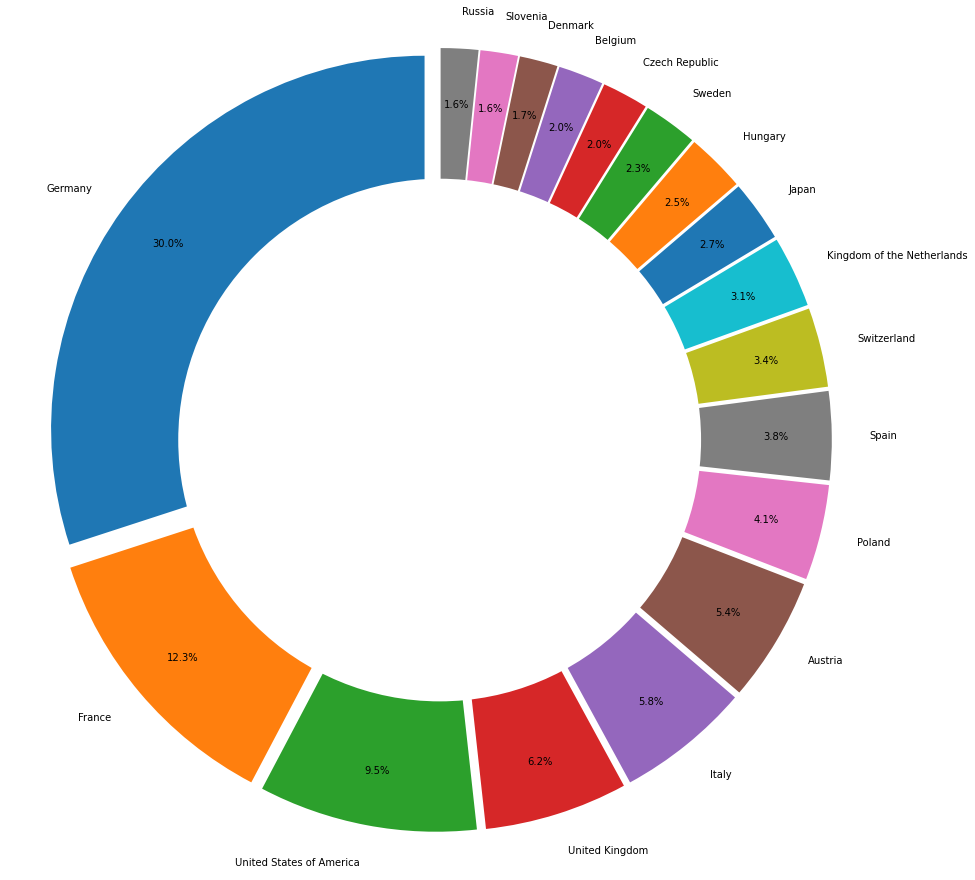

In [42]:
l = len(countrymale_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in countrymale_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Now let's combine the results to see the differences:

In [43]:
countryfem_query= """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totwomen)
"""



countrymen_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryLabel ?citizenshipLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P27 ?citizenship.
       
       ?citizenship wdt:P297 ?countryLabel.
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?countryLabel ?citizenshipLabel
ORDER BY DESC(?totmen)
"""


femcountryResults = execute_query(countryfem_query)
mencountryResults = execute_query(countrymen_query)

women:	 76 
men:	 68 
union:	 86


{'DE': {'women': 474, 'men': 1887},
 'US': {'women': 361, 'men': 595},
 'FR': {'women': 202, 'men': 776},
 'IT': {'women': 161, 'men': 364},
 'ES': {'women': 154, 'men': 242},
 'SI': {'women': 136, 'men': 102},
 'PL': {'women': 123, 'men': 260},
 'GB': {'women': 111, 'men': 391},
 'AT': {'women': 103, 'men': 340},
 'RU': {'women': 81, 'men': 102}}

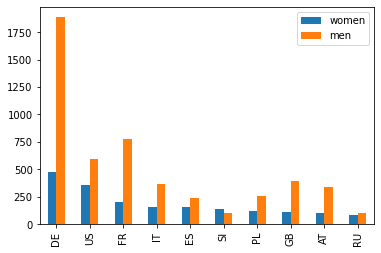

In [44]:
get_women_man_differences(womenResults = femcountryResults,
                          manResults = mencountryResults,
                          label = "citizenshipLabel")

## Place of education

In [45]:
educationfem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""
edfemcsv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
       ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?countryCode ?countryLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(educationfem_query)
sparql_wd.setReturnFormat(JSON)
educationfemResults = sparql_wd.query().convert()

In [46]:
universityfem = {}
universityfemlist = []
for result in educationfemResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totwomen"]["value"]
    university = result["educatedatLabel"]["value"]
    universityfem[country] = totaln
    universityfemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian that have studied in "  + university +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians that have studied in " + university +  "  (" + country+ ")")

There are 34  female art historians that have studied in University of Warsaw  (Poland)
There are 33  female art historians that have studied in Columbia University  (United States of America)
There are 32  female art historians that have studied in École du Louvre  (France)
There are 29  female art historians that have studied in University of Vienna  (Austria)
There are 27  female art historians that have studied in Harvard University  (United States of America)
There are 23  female art historians that have studied in University of Barcelona  (Spain)
There are 21  female art historians that have studied in Complutense University of Madrid  (Spain)
There are 19  female art historians that have studied in Jagiellonian University  (Poland)
There are 18  female art historians that have studied in Barnard College  (United States of America)
There are 17  female art historians that have studied in Eötvös Loránd University  (Hungary)
There are 15  female art historians that have studied in 

There is 1  female art historian that have studied in RWTH Aachen University  (Germany)
There is 1  female art historian that have studied in University of Florida  (United States of America)
There is 1  female art historian that have studied in Norwegian University of Science and Technology  (Norway)
There is 1  female art historian that have studied in Cornell University  (Mexico)
There is 1  female art historian that have studied in Latvian Academy of Culture  (Latvia)
There is 1  female art historian that have studied in Amsterdam University College  (Latvia)
There is 1  female art historian that have studied in Aarhus University  (Norway)
There is 1  female art historian that have studied in Jutland Art Academy  (Norway)
There is 1  female art historian that have studied in Lycée Lyautey  (France)
There is 1  female art historian that have studied in Paris-Sorbonne University - Paris IV  (Canada)
There is 1  female art historian that have studied in Střední uměleckoprůmyslová škol

In [47]:
import pandas as pd
import csv
df = pd.read_csv("universityfem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
studyfem_df = df[:10]

print(studyfem_df)

  countryCode           countryLabel  totwomen
0          US  Stati Uniti d'America       487
1          FR                Francia       143
2          DE               Germania       125
3          ES                 Spagna       123
4          GB            Regno Unito       108
5          PL                Polonia        90
6          RU                 Russia        66
7          CA                 Canada        49
8          IT                 Italia        42
9          AT                Austria        40


In [48]:
#since the results are in italian let's use google translator library
import googletrans
from googletrans import Translator
# create a translator object
translator = Translator()

# use translate method to translate a string - by default, the destination language is english
translated = translator.translate('Ciao Mondo')

# the translate method returns an object
print(translated)
# Translated(src=es, dest=en, text=Hello World, pronunciation=Hello World, extra_data="{'translat...")



Translated(src=it, dest=en, text=Hello World, pronunciation=None, extra_data="{'confiden...")


In [49]:
# obtain translated string by using attribute .text
translated.text
# 'Hello World'
# make a deep copy of the data frame
studyfem_en = studyfem_df.copy()

# translate columns' name using rename function
studyfem_en.rename(columns=lambda x: translator.translate(x).text, inplace=True)

# translated column names
studyfem_en.columns

Index(['countryCode', 'countryLabel', 'totwomen'], dtype='object')

In [50]:
#modify all the terms of the data frame by using the previously created dictionary
studyfem_en.replace(translator.translate(x).text, inplace = True)

# check translation
studyfem_en[:10]

,countryCode,countryLabel,totwomen
0,US,Stati Uniti d'America,487
1,FR,Francia,143
2,DE,Germania,125
3,ES,Spagna,123
4,GB,Regno Unito,108
5,PL,Polonia,90
6,PL,Russia,66
7,CA,Canada,49
8,IT,Italia,42
9,AT,Austria,40


In [51]:
unifem_dict = {}
unifem_list = studyfem_en[0:10]
unifem_dict = unifem_list.set_index('countryCode').T.to_dict('list') 
print(unifem_dict)

{'US': ["Stati Uniti d'America", 487], 'FR': ['Francia', 143], 'DE': ['Germania', 125], 'ES': ['Spagna', 123], 'GB': ['Regno Unito', 108], 'PL': ['Russia', 66], 'CA': ['Canada', 49], 'IT': ['Italia', 42], 'AT': ['Austria', 40]}


<ipython-input-51-1ca0fb42e1c9>:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  unifem_dict = unifem_list.set_index('countryCode').T.to_dict('list')


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-52-6de40a9e7a78>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


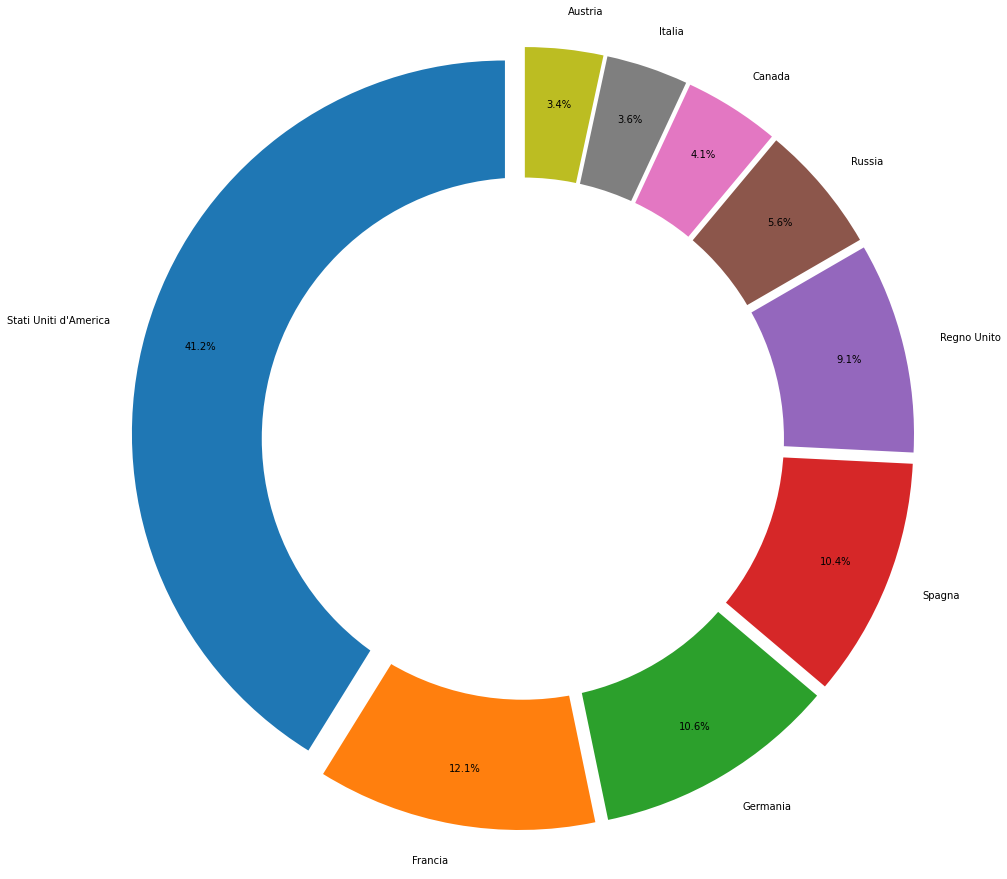

In [52]:
l = len(unifem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in unifem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's do the same with men

In [53]:
eduplaceman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totmen)
"""
edumancsv_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
       ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?countryCode ?countryLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(eduplaceman_query)
sparql_wd.setReturnFormat(JSON)
educationmanResults = sparql_wd.query().convert()

In [54]:
universitymen = {}
universitymenlist = []
for result in educationmanResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totmen"]["value"]
    university = result["educatedatLabel"]["value"]
    universitymen[country] = totaln
    universitymenlist.append(int(totaln))
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian that have studied in "  + university +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " male art historians that have studied in " + university +  "  (" + country+ ")")

There are 92  male art historians that have studied in Harvard University  (United States of America)
There are 79  male art historians that have studied in University of Vienna  (Austria)
There are 57  male art historians that have studied in University of Tokyo  (Japan)
There are 54  male art historians that have studied in University of Bonn  (Germany)
There are 53  male art historians that have studied in École normale supérieure  (Paris)  (France)
There are 53  male art historians that have studied in École des Chartes  (France)
There are 49  male art historians that have studied in Faculty of Arts, Charles University in Prague  (Czechoslovakia)
There are 48  male art historians that have studied in École du Louvre  (France)
There are 44  male art historians that have studied in Jagiellonian University  (Poland)
There are 42  male art historians that have studied in Ludwig Maximilian University of Munich  (Germany)
There are 42  male art historians that have studied in Yale Univer

There is 1  male art historian that have studied in University of North Texas  (United States of America)
There is 1  male art historian that have studied in Alamo Heights High School  (United States of America)
There is 1  male art historian that have studied in University College London  (Sri Lanka)
There is 1  male art historian that have studied in St Edward's School  (United Kingdom)
There is 1  male art historian that have studied in Chelsea College of Art and Design  (United Kingdom)
There is 1  male art historian that have studied in Central School of Art and Design  (United Kingdom)
There is 1  male art historian that have studied in Moscow State Automobile and Road University of Technology  (Russia)
There is 1  male art historian that have studied in Moscow State Automobile and Road University of Technology  (Soviet Union)
There is 1  male art historian that have studied in University of Paris  (statelessness)
There is 1  male art historian that have studied in University of 

There is 1  male art historian that have studied in Yerevan State Institute of Fine Arts and Theater  (Armenia)
There is 1  male art historian that have studied in Yerevan State Institute of Fine Arts and Theater  (Soviet Union)
There is 1  male art historian that have studied in University of Calcutta  (Nepal)
There is 1  male art historian that have studied in Government College of Art & Craft  (Nepal)
There is 1  male art historian that have studied in Comenius University in Bratislava  (Slovakia)
There is 1  male art historian that have studied in University of Bonn  (France)
There is 1  male art historian that have studied in Balliol College  (England)
There is 1  male art historian that have studied in Harrow School  (England)
There is 1  male art historian that have studied in St Paul's School  (United States of America)
There is 1  male art historian that have studied in Manchester Metropolitan University  (United Kingdom)
There is 1  male art historian that have studied in Uni

In [59]:
import pandas as pd
import csv
df = pd.read_csv("universitymen.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode           countryLabel  totmen
0           US  Stati Uniti d'America     684
1           DE               Germania     519
2           FR                Francia     446
3           GB            Regno Unito     440
4           PL                Polonia     196
5           JP               Giappone     165
6           ES                 Spagna     147
7           IT                 Italia     135
8           AT                Austria     119
9           RU                 Russia      95
10          NL  Regno dei Paesi Bassi      82
11          HU               Ungheria      70
12          CH               Svizzera      58
13          CA                 Canada      57
14          CZ        Repubblica Ceca      50
15          GR                 Grecia      49
16          BE                 Belgio      43
17          NO               Norvegia      34
18          SE                 Svezia      33
19          DK              Danimarca      33
20          RO                Roma

In [60]:
unimen_dict = {}
unimen_list = df_en[0:10]
unimen_dict = unifem_list.set_index('countryCode').T.to_dict('list') 
print(unimen_dict)

{'US': ["Stati Uniti d'America", 487], 'FR': ['Francia', 143], 'DE': ['Germania', 125], 'ES': ['Spagna', 123], 'GB': ['Regno Unito', 108], 'PL': ['Russia', 66], 'CA': ['Canada', 49], 'IT': ['Italia', 42], 'AT': ['Austria', 40]}


<ipython-input-60-699b49da7bb3>:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  unimen_dict = unifem_list.set_index('countryCode').T.to_dict('list')


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-61-8eb0492263bc>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


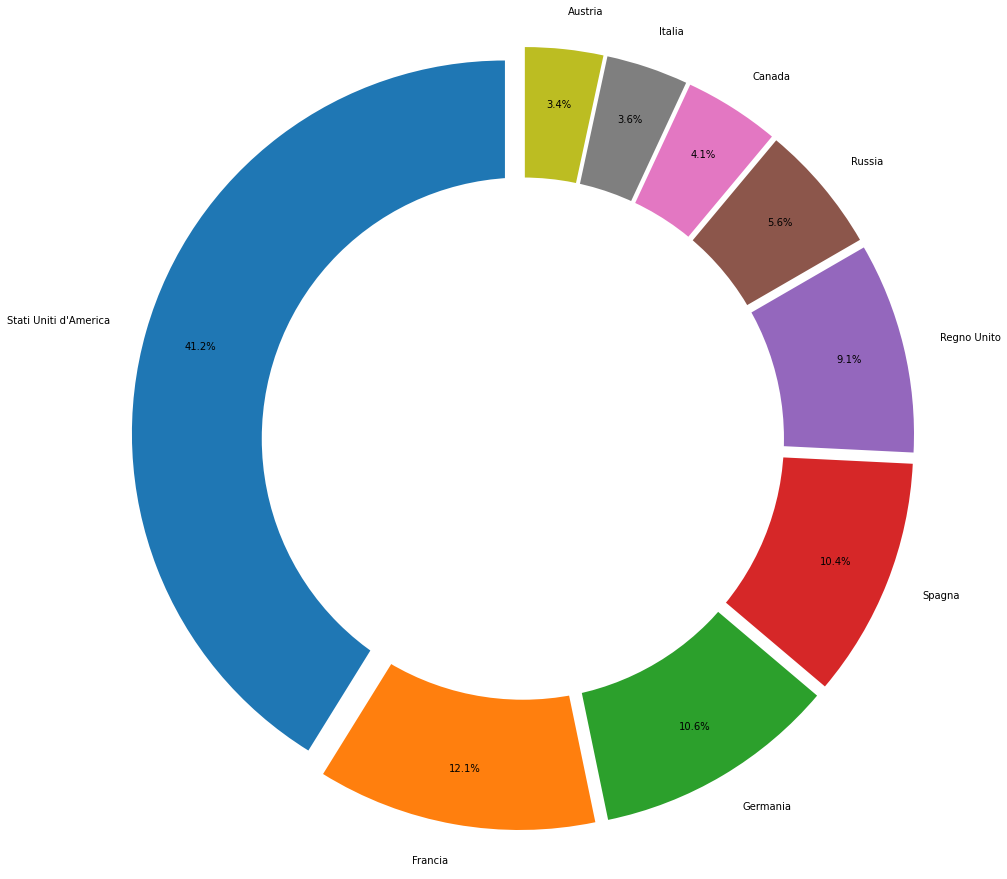

In [61]:
l = len(unimen_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in unimen_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's combine the results

In [62]:
educationfem_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totwomen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581072 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totwomen)
"""


eduplaceman_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?educatedatLabel ?countryLabel  (COUNT(?person) AS ?totmen)

WHERE
{
       ?person wdt:P31 wd:Q5 ;
            wdt:P21 wd:Q6581097 ;
            wdt:P106/wdt:P279* wd:Q1792450;
            wdt:P69 ?educatedat;
            wdt:P27 ?country.
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
    ?educatedat rdfs:label ?educatedatLabel .
    ?country     rdfs:label ?countryLabel .
  
  }

       
}
GROUP BY ?educatedatLabel ?countryLabel
ORDER BY DESC(?totmen)
"""


educationfemResults = execute_query(educationfem_query)
educationmanResults = execute_query(eduplaceman_query)

women:	 87 
men:	 129 
union:	 149


{'United States of America': {'women': 487, 'men': 684},
 'France': {'women': 143, 'men': 446},
 'Germany': {'women': 125, 'men': 519},
 'Spain': {'women': 123, 'men': 147},
 'United Kingdom': {'women': 108, 'men': 440},
 'Soviet Union': {'women': 105, 'men': 216},
 'Poland': {'women': 90, 'men': 196},
 'Russia': {'women': 66, 'men': 95},
 'Canada': {'women': 49, 'men': 57},
 'Italy': {'women': 42, 'men': 135}}

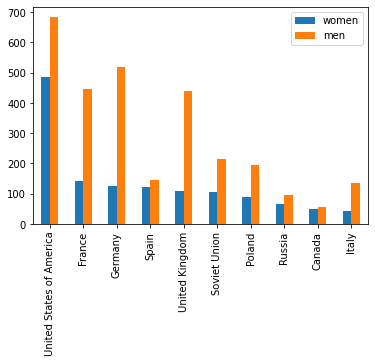

In [63]:
get_women_man_differences(womenResults = educationfemResults,
                          manResults = educationmanResults,
                          label = "educatedatLabel")

## Workplace

In [64]:
feminstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(feminstitute_query)
sparql_wd.setReturnFormat(JSON)
feminstituteResults = sparql_wd.query().convert()

feminstitutecsv_query = """

PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?countryCode ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?countryCode  ?countryLabel
ORDER BY DESC (?totwomen)

"""

In [65]:
institutefem = {}
intitutefemlist = []
for result in feminstituteResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totwomen"]["value"]
    institute = result["institutionLabel"]["value"]
    institutefem[country] = totaln
    intitutefemlist.append(int(totaln))
    if result["totwomen"]["value"] == str(1):
        print("There is "+ totaln +" " + " female art historian that works in "  + institute +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " female art historians that work in " + institute +  "  (" + country+ ")")

There are 48  female art historians that work in German Archaeological Institute  (Germany)
There are 18  female art historians that work in American Academy of Arts and Sciences  (United States of America)
There are 13  female art historians that work in Academia Europaea  (United Kingdom)
There are 12  female art historians that work in Royal Swedish Academy of Letters, History and Antiquities  (Sweden)
There are 10  female art historians that work in Medieval Academy of America  (United States of America)
There are 8  female art historians that work in British Academy  (United Kingdom)
There are 7  female art historians that work in Real Academia de Bellas Artes de San Fernando  (Spain)
There are 6  female art historians that work in Mommsen Society  (Germany)
There are 6  female art historians that work in Reial Acadèmia Catalana de Belles Arts de Sant Jordi  (Spain)
There are 6  female art historians that work in College Art Association  (United States of America)
There are 6  fem

In [4]:
import pandas as pd
import csv
df = pd.read_csv("institutefem.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
wf_df = df[0:10]
print(wf_df)

             countryLabel countryCode  totwomen
0                Germania          DE        96
1   Stati Uniti d'America          US        80
2                  Spagna          ES        40
3             Regno Unito          GB        32
4                 Francia          FR        31
5                  Italia          IT        22
6                  Svezia          SE        16
7                 Austria          AT        11
8                  Belgio          BE         8
9                 Polonia          PL         8
10                Ucraina          UA         8
11            Paesi Bassi          NL         7
12               Norvegia          NO         7
13                Armenia          AM         6
14            Bielorussia          BY         6
15                Messico          MX         5
16                Estonia          EE         4
17               Bulgaria          BG         3
18              Danimarca          DK         3
19                 Grecia          GR   

In [66]:
#for readability reason of the visualization are taken into consideration the first 9 countries, to see graphically what are the 
edufem_dict = {}
edufem_list = wf_df[0:10]
edufem_dict = edufem_list.set_index('countryCode').T.to_dict('list') 
print(edufem_dict)

{'DE': ['Germania', 96], 'US': ["Stati Uniti d'America", 80], 'ES': ['Spagna', 40], 'GB': ['Regno Unito', 32], 'FR': ['Francia', 31], 'IT': ['Italia', 22], 'SE': ['Svezia', 16], 'AT': ['Austria', 11], 'BE': ['Belgio', 8], 'PL': ['Polonia', 8]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-67-f1ecf7f18cf5>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


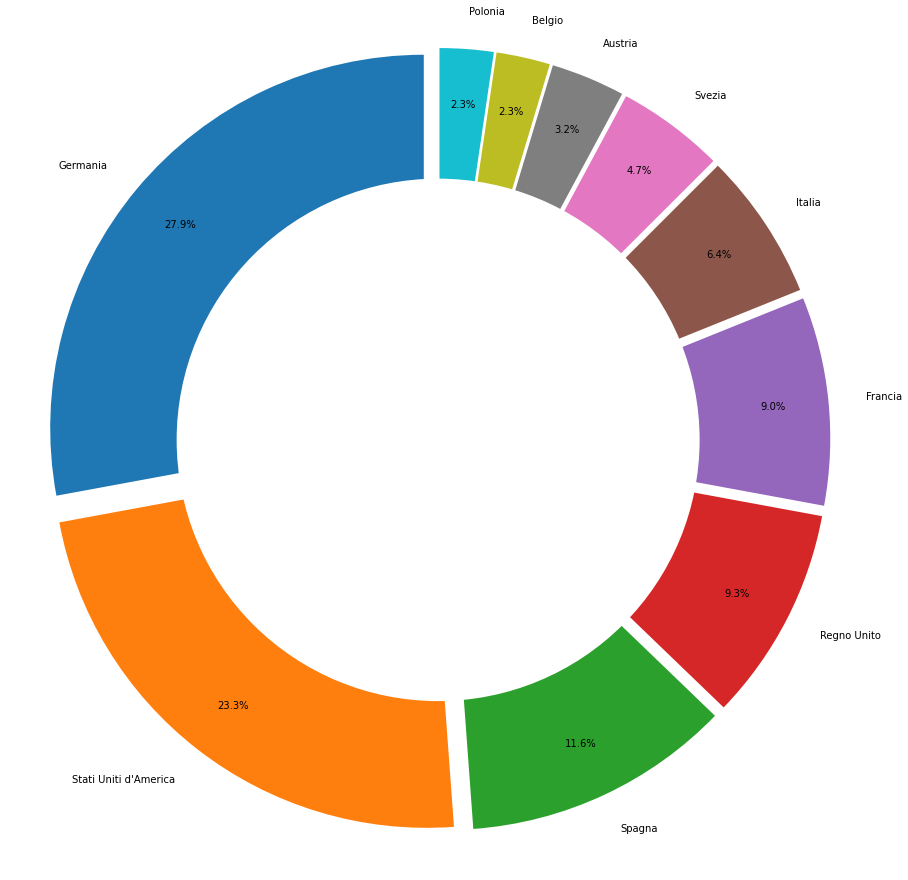

In [67]:
l = len(edufem_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in edufem_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's do the same with the men

In [68]:
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl
import pprint as pp
import pandas as pd
import seaborn as sns

ssl._create_default_https_context = ssl._create_unverified_context

wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
maleinstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totmen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(maleinstitute_query)
sparql_wd.setReturnFormat(JSON)
maleinstituteResults = sparql_wd.query().convert()

maleinstitutecsv_query = """

"""

In [69]:
institutemen = {}
intitutemenlist = []
for result in maleinstituteResults["results"]["bindings"]:
    country = result["countryLabel"]["value"]
    totaln = result["totmen"]["value"]
    institute = result["institutionLabel"]["value"]
    institutemen[country] = totaln
    intitutemenlist.append(int(totaln))
    if result["totmen"]["value"] == str(1):
        print("There is "+ totaln +" " + " male art historian that works in "  + institute +  "  (" + country+ ")")
    else:
        print("There are "+ totaln + " " + " male art historians that work in " + institute +  "  (" + country+ ")")

There are 428  male art historians that work in German Archaeological Institute  (Germany)
There are 136  male art historians that work in American Academy of Arts and Sciences  (United States of America)
There are 94  male art historians that work in Académie des Inscriptions et Belles-Lettres  (France)
There are 88  male art historians that work in Royal Swedish Academy of Letters, History and Antiquities  (Sweden)
There are 84  male art historians that work in Bavarian Academy of Sciences and Humanities  (Germany)
There are 66  male art historians that work in Austrian Archaeological Institute  (Austria)
There are 56  male art historians that work in Royal Prussian Academy of Sciences  (Germany)
There are 54  male art historians that work in Lincean Academy  (Italy)
There are 53  male art historians that work in Real Academia de Bellas Artes de San Fernando  (Spain)
There are 51  male art historians that work in British Academy  (United Kingdom)
There are 48  male art historians tha

In [70]:
import pandas as pd
import csv
df = pd.read_csv("instituteman.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)
print(df[0:18])

   countryCode           countryLabel  totmen
0           DE               Germania     911
1           FR                Francia     331
2           US  Stati Uniti d'America     242
3           GB            Regno Unito     206
4           ES                 Spagna     183
5           IT                 Italia     173
6           SE                 Svezia     132
7           AT                Austria     122
8           PL                Polonia      78
9           NL            Paesi Bassi      56
10          BE                 Belgio      49
11          HU               Ungheria      33
12          RU                 Russia      30
13          RS                 Serbia      30
14          NO               Norvegia      20
15          UA                Ucraina      19
16          GR                 Grecia      17
17          DK              Danimarca      14
18          CZ        Repubblica Ceca      13
19          AM                Armenia      13
20          BY            Bielorus

In [71]:
#for readability reason of the visualization are taken into consideration the first 9 countries, to see graphically what are the 
edumen_dict = {}
edumen_list = df_en[0:10]
edumen_dict = edufem_list.set_index('countryCode').T.to_dict('list') 
print(edumen_dict)

{'DE': ['Germania', 96], 'US': ["Stati Uniti d'America", 80], 'ES': ['Spagna', 40], 'GB': ['Regno Unito', 32], 'FR': ['Francia', 31], 'IT': ['Italia', 22], 'SE': ['Svezia', 16], 'AT': ['Austria', 11], 'BE': ['Belgio', 8], 'PL': ['Polonia', 8]}


(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


<ipython-input-72-0c374f460dd2>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


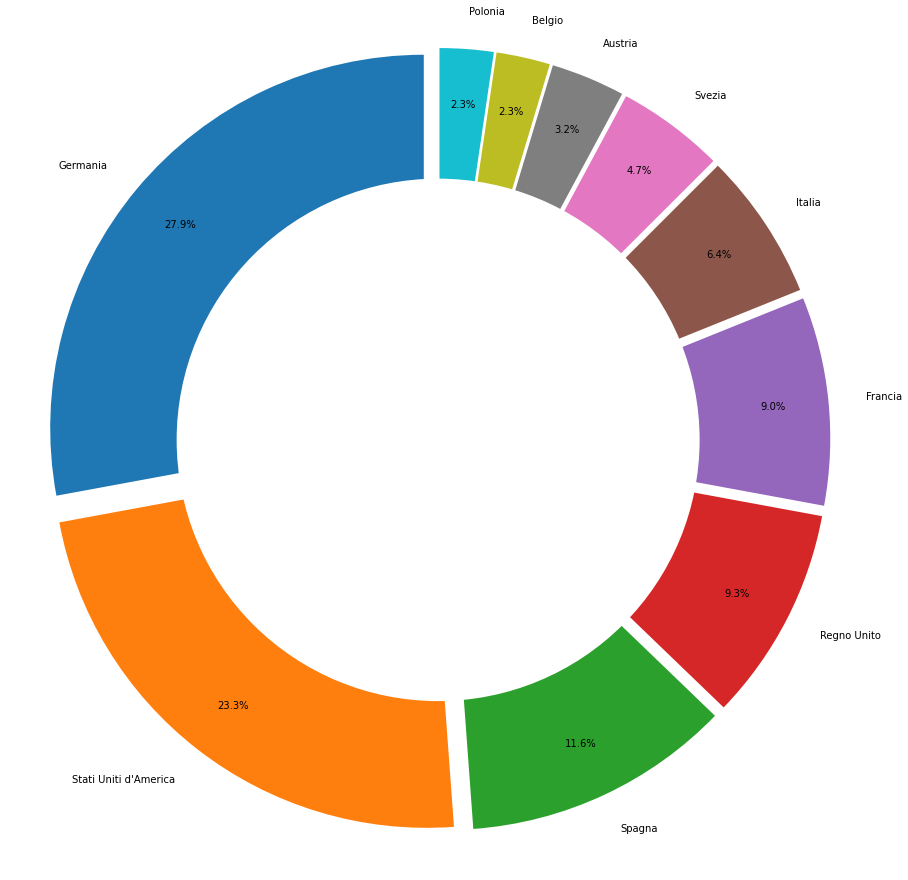

In [72]:
l = len(edumen_dict)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in edumen_dict.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Let's combine the results 

In [73]:
feminstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totwomen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581072;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totwomen)
"""


maleinstitute_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>
SELECT DISTINCT ?institutionLabel ?countryLabel  (count(?person) as ?totmen) WHERE {
  
  ?person wdt:P31 wd:Q5; 
             wdt:P21 wd:Q6581097;
            wdt:P106/wdt:P279* wd:Q1792450;
             wdt:P463 ?institution.
            ?institution wdt:P17 ?country.
    ?country wdt:P297 ?countryCode.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
}

GROUP BY ?institutionLabel  ?countryLabel
ORDER BY DESC (?totmen)
"""

feminstituteResults = execute_query(feminstitute_query)
maleinstituteResults = execute_query(maleinstitute_query)

women:	 33 
men:	 46 
union:	 47


{'Germany': {'women': 96, 'men': 911},
 'United States of America': {'women': 80, 'men': 242},
 'Spain': {'women': 40, 'men': 183},
 'France': {'women': 32, 'men': 331},
 'United Kingdom': {'women': 32, 'men': 205},
 'Italy': {'women': 22, 'men': 173},
 'Sweden': {'women': 16, 'men': 132},
 'Austria': {'women': 11, 'men': 122},
 'Poland': {'women': 8, 'men': 78},
 'Belgium': {'women': 8, 'men': 49}}

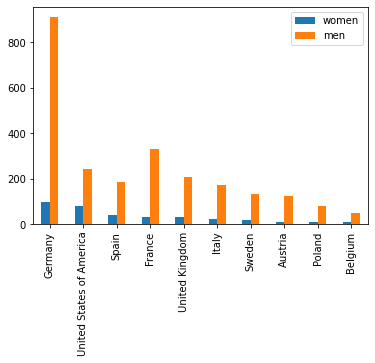

In [74]:
get_women_man_differences(womenResults = feminstituteResults,
                          manResults = maleinstituteResults,
                          label = "institutionLabel")

## Occupation

In [75]:
femoccupation_query ="""
SELECT DISTINCT ?occupationLabel (COUNT(?person) AS ?totwomen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 wd:Q6581072;
              wdt:P106/wdt:P279* wd:Q1792450;
              wdt:P106 ?occupation ;
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?occupationLabel
ORDER BY DESC(?totwomen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(femoccupation_query)
sparql_wd.setReturnFormat(JSON)
femoccupationResults = sparql_wd.query().convert()

In [76]:
import pandas as pd
import csv
df = pd.read_csv("occupation.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


                       occupationLabel  totwoman
0                        art historian      4818
1                   university teacher       405
2                            historian       404
3                   exhibition curator       383
4                              curator       340
5                               writer       337
6                        archaeologist       181
7              architectural historian       159
8                           art critic       149
9                           journalist       131
10                          translator       109
11                  opinion journalist       104
12                              author       100
13                             teacher        98
14                           professor        84
15                             painter        78
16                     museum director        78
17                         museologist        68
18                           librarian        57
19                  

In [77]:
datawoman = df.drop([0], axis=0 ) #pandas method for cutting a single row delete all rows with the first label
print(datawoman)

                       occupationLabel  totwoman
1                   university teacher       405
2                            historian       404
3                   exhibition curator       383
4                              curator       340
5                               writer       337
6                        archaeologist       181
7              architectural historian       159
8                           art critic       149
9                           journalist       131
10                          translator       109
11                  opinion journalist       104
12                              author       100
13                             teacher        98
14                           professor        84
15                             painter        78
16                     museum director        78
17                         museologist        68
18                           librarian        57
19                           architect        55
20                  

In [78]:
#among the results we decide to take the first most significan 10, in order to graph to them 
#DataFrame as a Dictionary, access its columns using the indexing [] notation
#iloc is a pandas method for specific operators for rows/columns selection, odataframe.iloc[where_i,where_j]
#index-based selection, i.e. select rows and columns by integer position
#where_i is the row number (: otherwise), where_j is the column number (can be omitted).
occupationwomen = df.iloc[1:11] 
print(occupationwomen)

            occupationLabel  totwoman
1        university teacher       405
2                 historian       404
3        exhibition curator       383
4                   curator       340
5                    writer       337
6             archaeologist       181
7   architectural historian       159
8                art critic       149
9                journalist       131
10               translator       109


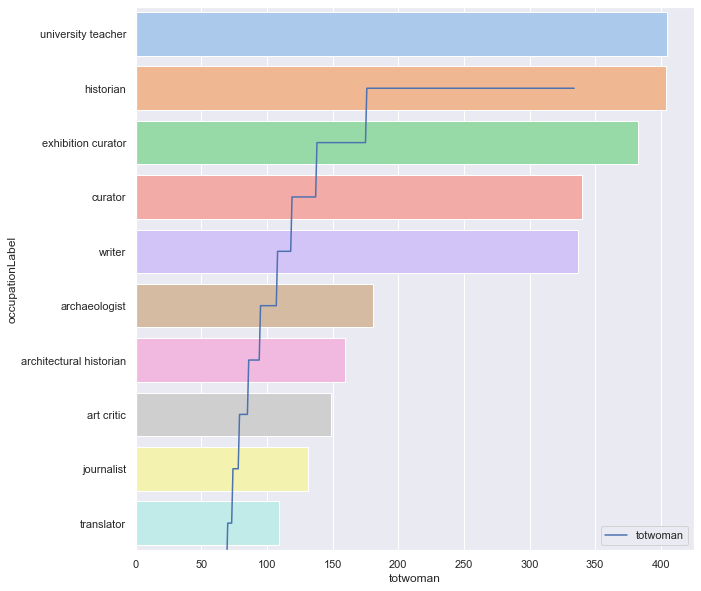

In [79]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
df.plot(figsize=(10,10))
my_graph = sns.barplot(y="occupationLabel", x ="totwoman", palette="pastel", data= occupationwomen)

In [80]:
menoccupation_query = """
SELECT DISTINCT ?occupationLabel (COUNT(?person) AS ?totmen)
WHERE
{
       ?person wdt:P31 wd:Q5 ;
              wdt:P21 wd:Q6581097;
              wdt:P106/wdt:P279* wd:Q1792450;
              wdt:P106 ?occupation ;
       
       SERVICE wikibase:label {bd:serviceParam wikibase:language "en" }
}
GROUP BY ?occupationLabel
ORDER BY DESC(?totmen)
"""
sparql_wd = SPARQLWrapper(wikidata_endpoint, agent='Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36')
sparql_wd.setQuery(menoccupation_query)
sparql_wd.setReturnFormat(JSON)
menoccupationResults = sparql_wd.query().convert()

In [81]:
import pandas as pd
import csv
df = pd.read_csv("occupationmale_query.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

                                       occupationLabel  totmen
0                                        art historian   10258
1                                   university teacher    1785
2                                        archaeologist    1091
3                                            historian    1013
4                                               writer     999
5                              architectural historian     765
6                                              painter     603
7                                            architect     556
8                                              curator     510
9                                           art critic     461
10                                  exhibition curator     422
11                                             teacher     389
12                                          journalist     363
13                                      anthropologist     274
14                                     museum director 

In [82]:
datamen = df.drop([0], axis=0 ) #pandas method for cutting a single row delete all rows with the first label
print(datamen)

                                       occupationLabel  totmen
1                                   university teacher    1785
2                                        archaeologist    1091
3                                            historian    1013
4                                               writer     999
5                              architectural historian     765
6                                              painter     603
7                                            architect     556
8                                              curator     510
9                                           art critic     461
10                                  exhibition curator     422
11                                             teacher     389
12                                          journalist     363
13                                      anthropologist     274
14                                     museum director     261
15                                                poet 

In [83]:
occupationmen = df.iloc[1:11] 
print(occupationmen)

            occupationLabel  totmen
1        university teacher    1785
2             archaeologist    1091
3                 historian    1013
4                    writer     999
5   architectural historian     765
6                   painter     603
7                 architect     556
8                   curator     510
9                art critic     461
10       exhibition curator     422


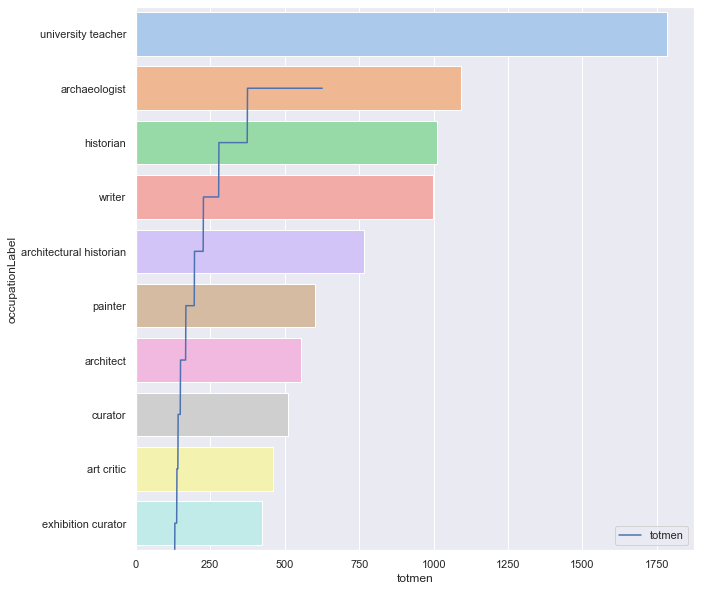

In [84]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
df.plot(figsize=(10,10))
my_graph = sns.barplot(y="occupationLabel", x ="totmen", palette="pastel", data= occupationmen)

### Where did came from the female art historians that are born and have citizenship of the same country?

In [85]:
citizenfem_df 
# Reset the index values to the second dataframe appends properly
citizenfem_df = citizenfem_df.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

In [86]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([citizenfem_df, birthfem_df ], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([citizenfem_df, birthfem_df], axis=1)

In [87]:
#convert into an int the number
citizenfem_df['totwomen']=citizenfem_df['totwomen'].astype(int)
birthfem_df['totwomen']=citizenfem_df['totwomen'].astype(int)

In [88]:

#vertical_stack = pd.concat([citizenfem_df, birthfem_df ], axis=0)
merged_bc = pd.merge(left=citizenfem_df, right=birthfem_df)
merged_bc

,countryCode,countryLabel,totwomen
0,DE,Germany,473
1,IT,Italy,160
2,ES,Spain,152
3,PL,Poland,122


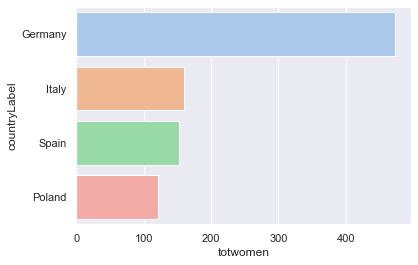

In [89]:
#plot the count
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

my_graph = sns.barplot(y="countryLabel", x ="totwomen", palette="pastel", data= merged_bc)

As we can see the majority of the are born and have the German citizenship, then the italian, spanish and polish one. 

# Conclusions

- As we can see the majority of the art historians in the world are male, so in proportion for every comparsion that was made the men are always numerical superior to women
- The most common occupations among female art historian are: university teacher(405) historian (404) and exhibition curator while  among men are: university teacher (1785), archaeologist (1091) and then historian (1013)
- The majority of female art hitorians are born and have died in Germany, have a german citizenship, and also have worked in german institute but they have studied in the United States universities.  